In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040083.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.396078  0.392157  0.388235  0.384314  0.380392  0.376471  0.376471   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.372549  0.372549  0.372549  ...  0.517647  0.513725  0.509804  0.505882   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.501961  0.494118  0.490196  0.486275    108.557576      55.254545  

[1 rows x 4202 columns]
[108.55757576]  /  [55.25454545]
          0         1         2         3         4         5         6  \
0  0.396078  0.392157  0.388235  0.384314  0.380392  0.376471  0.376471   

          7         8         9  ...      4190     4191      4192      4193  \
0  0.372549  0.372549  0.372549  ...  0.529412  0.52549  0.517647  0.513725   

       4194      4195      4196      4197      4198      4199  
0  0.509804  0.505882  0.501961  0.494118  0.490196  0.486275  

[1 rows x 4200 columns]


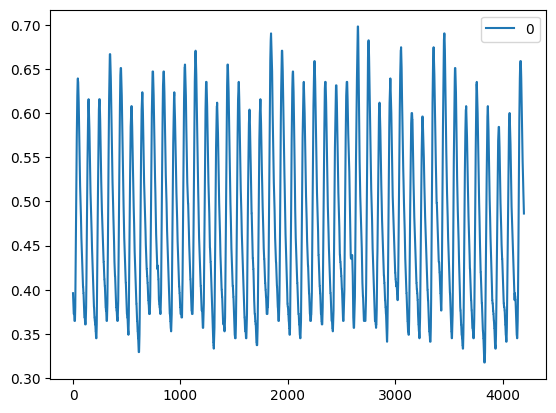

In [100]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [101]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

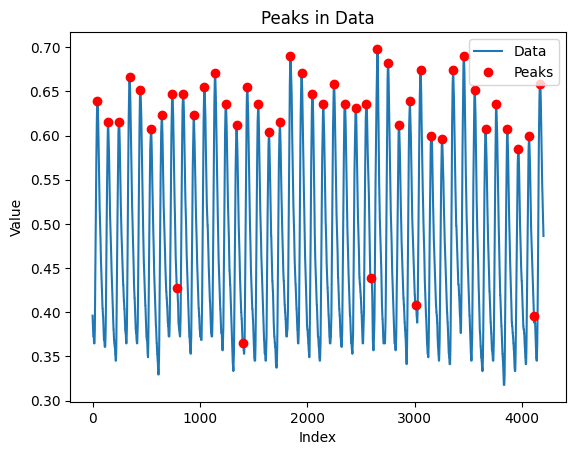

{'indices': array([  44,  145,  246,  344,  445,  544,  645,  743,  787,  844,  943,
       1042, 1141, 1241, 1342, 1404, 1440, 1543, 1643, 1744, 1843, 1946,
       2047, 2149, 2248, 2349, 2451, 2550, 2597, 2653, 2752, 2854, 2954,
       3011, 3054, 3154, 3254, 3358, 3458, 3558, 3661, 3759, 3862, 3965,
       4065, 4115, 4167]), 'values': array([0.63921569, 0.61568627, 0.61568627, 0.66666667, 0.65098039,
       0.60784314, 0.62352941, 0.64705882, 0.42745098, 0.64705882,
       0.62352941, 0.65490196, 0.67058824, 0.63529412, 0.61176471,
       0.36470588, 0.65490196, 0.63529412, 0.60392157, 0.61568627,
       0.69019608, 0.67058824, 0.64705882, 0.63529412, 0.65882353,
       0.63529412, 0.63137255, 0.63529412, 0.43921569, 0.69803922,
       0.68235294, 0.61176471, 0.63921569, 0.40784314, 0.6745098 ,
       0.6       , 0.59607843, 0.6745098 , 0.69019608, 0.65098039,
       0.60784314, 0.63529412, 0.60784314, 0.58431373, 0.6       ,
       0.39607843, 0.65882353])}
    Index     Value
0  

In [102]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [105]:
def split_values_high_low(filtered_df, threshold=0.55):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.6392156862745098, 0.615686274509804, 0.615686274509804, 0.6666666666666666, 0.6509803921568628, 0.6078431372549019, 0.6235294117647059, 0.6470588235294118, None, 0.6470588235294118, 0.6235294117647059, 0.6549019607843137, 0.6705882352941176, 0.6352941176470588, 0.611764705882353, None, 0.6549019607843137, 0.6352941176470588, 0.6039215686274509, 0.615686274509804, 0.6901960784313725, 0.6705882352941176, 0.6470588235294118, 0.6352941176470588, 0.6588235294117647, 0.6352941176470588, 0.6313725490196078, 0.6352941176470588, None, 0.6980392156862745, 0.6823529411764706, 0.611764705882353, 0.6392156862745098, None, 0.6745098039215687, 0.6, 0.596078431372549, 0.6745098039215687, 0.6901960784313725, 0.6509803921568628, 0.6078431372549019, 0.6352941176470588, 0.6078431372549019, 0.5843137254901961, 0.6, None, 0.6588235294117647]
[None, None, None, None, None, None, None, None, 0.4274509803921568, None, None, None, None, None, None, 0.3647058823529411, None, None, None, None, None, None, None

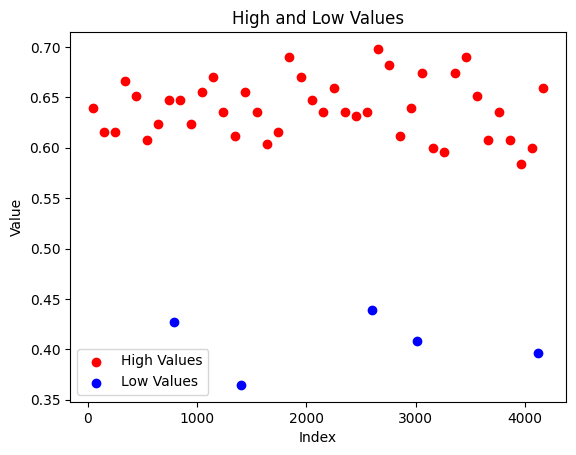

In [106]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [107]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.6389355742296919
Average Low Value: 0.40705882352941175
